# Programación 201

# NBA player of the week

### Ejercicio 1

# Descripción y enunciado
El objetivo de esta actividad es la gestión y preparación de datos. La gestión de datos es una parte muy importante de cualquier proceso de minería de datos, ya que los datos se deben preparar y preprocesar antes de iniciar el proceso de extracción de conocimiento.
Esta tarea ilustra algunos de los procedimientos básicos con los que nos podemos encontrar para preparar los datos: analizar los tipos de datos, tranformar valores, detectar e eliminar outliers, hacer un muestreo, etcétera.

# Fichero de datos
El conjunto de datos con el que trabajaremos en esta actividad surge de la bases de datos disponibles en Kaggle . En concreto, los datos corresponden a los jugadores nombrados jugadores de la semana desde la temporada 1984-1985 hasta la temporada 2017-2018. Estos datos nos ofrecen múltiples posibilidades para consolidar los conocimientos y competencias de manipulación de datos, preprocesado y análisis descriptivo. El fichero `NBA_player_of_the_week.csv` se encuentra adjunto.


# Ingesta de datos
Actualmente el fichero se encuentra en la misma carpeta de datos RMD, está en adjunto. Se enviará nueva práctica similar con los datos de ingesta a través de scraping / API / base de datos para R y Python.


# Valoraciones
- se valorarán los trabajos por los detalles, no vale con el solo enviar un trozo de código, sino la explicación es fundamental
- explicar además los resumen de cada sección (carga, preparación, EDA, limpieza, nuevos atributos, discretización, split train-test)
- conclusiones y comparativas son los más importantes para comenzar con Data Mining.


## 1. Cargar un juego de datos.

In [1]:
# Importamos librerías.
import pandas as pd
import numpy as np

In [2]:
# Cargamos los datos del fichero en un dataframe.
nba = pd.read_csv("NBA_player_of_the_week.csv", header = 0)

## 2. Descripción de los datos.

In [3]:
# Miramos el tipo de dato.
type(nba)

pandas.core.frame.DataFrame

In [4]:
# Miramos el tipo de dato.
nba.dtypes

Age                    int64
Conference            object
Date                  object
Draft Year             int64
Height                object
Player                object
Position              object
Season                object
Season short           int64
Seasons in league      int64
Team                  object
Weight                object
Real_value           float64
dtype: object

In [5]:
# Miramos el tipo de estructura.
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1145 non-null   int64  
 1   Conference         761 non-null    object 
 2   Date               1145 non-null   object 
 3   Draft Year         1145 non-null   int64  
 4   Height             1145 non-null   object 
 5   Player             1145 non-null   object 
 6   Position           1145 non-null   object 
 7   Season             1145 non-null   object 
 8   Season short       1145 non-null   int64  
 9   Seasons in league  1145 non-null   int64  
 10  Team               1145 non-null   object 
 11  Weight             1145 non-null   object 
 12  Real_value         1145 non-null   float64
dtypes: float64(1), int64(4), object(8)
memory usage: 116.4+ KB


In [6]:
# Primeros resultados.
nba.head()

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
0,29,NaN,"Apr 14, 1985",1978,6-5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,NaN,"Apr 7, 1985",1982,6-6,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,NaN,"Apr 1, 1985",1979,6-6,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0
3,37,NaN,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
4,28,NaN,"Mar 17, 1985",1978,6-9,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0


In [7]:
# Extraemos el listado de las variables (columnas).
nba.columns

Index(['Age', 'Conference', 'Date', 'Draft Year', 'Height', 'Player',
       'Position', 'Season', 'Season short', 'Seasons in league', 'Team',
       'Weight', 'Real_value'],
      dtype='object')

In [8]:
# Extraemos las etiquetas de las filas.
nba.index.values

array([   0,    1,    2, ..., 1142, 1143, 1144], dtype=int64)

# 3. Preparación de la base de datos.
## 3.1. Asignar NA a los valores ausentes en los datos de Conference.

In [9]:
# Comprobamos los valores del atributo `Conference`.
nba['Conference'].value_counts(dropna = False)

NaN     384
East    381
West    380
Name: Conference, dtype: int64

In [10]:
# Comprobamos el tipo de variable que es el atributo `Conference`.
nba['Conference'].dtypes

dtype('O')

En el caso de que hubiera valores ausentes, podríamos aplicar el siguiente código para asignar a los valores ausentes en los datos de `Conference`.

In [11]:
# Asignar NA a los valores ausentes en los datos de Conference.
nba.loc[nba['Conference'] == "", 'Conference'] = np.nan

In [12]:
# Comprobamos los valores distintos dentro de la variable `Conference`.
nba['Conference'].unique()

array([nan, 'East', 'West'], dtype=object)

## 3.2. Transformar los datos de Conference en variable categórica y mostrar la tabla de frecuencia.

In [13]:
# Realizamos la factorización del atributo.
nba['Conference'] = nba['Conference'].astype('category')

In [14]:
# Comprobamos los niveles.
nba['Conference'].dtypes

CategoricalDtype(categories=['East', 'West'], ordered=False)

In [15]:
# Mostramos la tabla de frecuencias absolutas.
nba['Conference'].value_counts(dropna = False)

NaN     384
East    381
West    380
Name: Conference, dtype: int64

## 3.3. Comprobar que la variable tiene xxx valores ausentes.

In [16]:
# Sumamos todos los NAs en la variable conf.
nba['Conference'].isnull().sum()

384

## 3.4. Transformar las variables Height, Player, Position, Season, Team y Weight en variables categóricas.

In [17]:
# Realizamos la factorización de los atributos.
nba['Height'] = nba['Height'].astype("category")
nba['Player'] = nba['Player'].astype("category")
nba['Position'] = nba['Position'].astype("category")
nba['Season'] = nba['Season'].astype("category")
nba['Team'] = nba['Team'].astype("category")
nba['Weight'] = nba['Weight'].astype("category")

## 3.5. Comprobar que estas variables no tienen valores perdidos.

In [18]:
# Sumamos todos los NAs existentes en cada una de las columnas.
nba[['Height', 'Player', 'Position', 'Season', 'Team', 'Weight']].isnull().sum()

Height      0
Player      0
Position    0
Season      0
Team        0
Weight      0
dtype: int64

## 3.6. Calcular el número de años que pasan entre que salio el jugador elegido en el draft y la temporada en la que fue jugador de la semana. Denomina la variable tiempo.

In [19]:
# Operamos entre columnas y guardamos el resultado en una nueva variable.
nba['Tiempo'] =  nba['Season short'] - nba['Draft Year']

# Motramos los primeros resultados de la nueva variable para comprobar que se ha creado correctamente.
nba['Tiempo'].head()

0     7
1     3
2     6
3    16
4     7
Name: Tiempo, dtype: int64

## 3.7. ¿Cual es el número de años que más veces se repite entre que salen elegidos en el draft y se proclaman mejores jugadores? (moda de la variable tiempo)

In [20]:
# Calculamos la moda del atributo `Tiempo`.
nba['Tiempo'].mode()

0    7
dtype: int64

## 3.8. La altura de los jugadores está expresada en pies (aquellas con guión) y cm. Convertir la altura expresada en pies a centimetros [https://www.piesametros.info/](https://www.piesametros.info/). Posteriormente, eliminar el texto “cm” de los datos de tipo altura y convertir la variable en numérica. Calcular media, desviación típica y boxplot.

In [21]:
# Pasamos el atributo a tipo character.
nba['Height'] = nba['Height'].astype("str")


# Creamos las variables de conversión.
inches_in_a_feet = 12
cm_in_a_inch = 2.54


# Iteramos sobre la columna altura a lo largo de todas sus filas.
for row in range(len(nba['Height'])):
    if "-" in nba['Height'][row]:
        partes = nba['Height'][row].split("-")
        nba.loc[row, 'Height'] = (int(partes[0]) * inches_in_a_feet * cm_in_a_inch) + (int(partes[1]) * cm_in_a_inch)
    elif "cm" in nba['Height'][row]:
        nba.loc[row, 'Height'] = nba['Height'][row].replace("cm", "")


# Pasamos el atributo a tipo numeric.
nba['Height'] = pd.to_numeric(nba['Height'])

In [22]:
# Mostramos la columna para comprobar el cambio.
nba['Height']

0       195.58
1       198.12
2       198.12
3       218.44
4       205.74
         ...  
1140    196.00
1141    193.00
1142    211.00
1143    211.00
1144    196.00
Name: Height, Length: 1145, dtype: float64

In [23]:
# Calculamos la media de la Altura.
nba['Height'].mean()

201.02310917030567

In [24]:
# Calculamos la desviación típica de la Altura.
nba['Height'].std()

9.410947284208344

<AxesSubplot:>

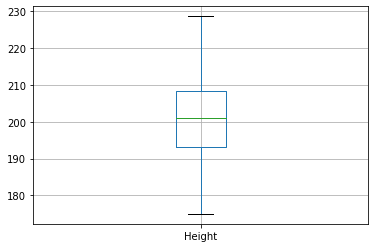

In [25]:
# Visualizamos el boxplot de la columna.
nba.boxplot(column = "Height")

## 3.9. El peso de los jugadores está expresada en libras y kg. Convertir el peso expresado en kgs en libras [https://www.metric-conversions.org/es/peso/kilogramos-a-libras.htm](https://www.metric-conversions.org/es/peso/kilogramos-a-libras.htm). Convertir la variable en numérica.Calcular media, desviación típica y boxplot.

In [26]:
# Pasamos el atributo a tipo character.
nba['Weight'] = nba['Weight'].astype("str")


# Creamos la variable de conversión.
one_kg_in_lb = 2.204623


# Iteramos sobre la columna peso a lo largo de todas sus filas.
for row in range(len(nba['Weight'])):
    if "kg" in nba['Weight'][row]:
        nba.loc[row, 'Weight'] = int(nba['Weight'][row].replace("kg", "")) *  one_kg_in_lb


# Pasamos el atributo a tipo numeric.
nba['Weight'] = pd.to_numeric(nba['Weight'])

In [27]:
# Mostramos la columna para comprobar el cambio.
nba['Weight']

0       189.000000
1       205.000000
2       220.000000
3       225.000000
4       220.000000
           ...    
1140    220.462300
1141    209.439185
1142    268.964006
1143    222.666923
1144    220.462300
Name: Weight, Length: 1145, dtype: float64

In [28]:
# Calculamos la media del Peso.
nba['Weight'].mean()

226.00391139388645

In [29]:
# Calculamos la desviación típica del Peso.
nba['Weight'].std()

31.577685191009163

<AxesSubplot:>

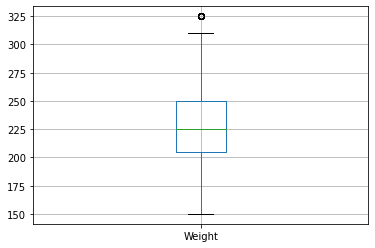

In [30]:
# Visualizamos el boxplot de la columna.
nba.boxplot(column = "Weight")

# 4. Información sobre posiciones en el campo y equipos.

## 4.1. Fusionar las categorias de posición en el campo F,F-C y FC en la categoría genérica Forward. Fusionar las categorias G,G-F y GF en la categoria genérica Guard. Renombrar la categoría ‘PG’ como ‘Point Guard’, ‘SG’ como ‘Shooting Guard’, ‘SF’ como ‘Small Forward’, ‘PF’ como ‘Power Forward’ y ‘C’ como ‘Center’.

In [31]:
# Pasamos el atributo a tipo character.
nba['Position'] = nba['Position'].astype("str")

# Fusionamos las categorías "F", "F-C", "FC" en "Forward"
nba.loc[nba['Position'].isin(['F', 'F-C', 'FC']), 'Position'] = "Forward"

# Fusionamos las categorías "G", "G-F", "GF" en "Guard"
nba.loc[nba['Position'].isin(['G', 'G-F', 'GF']), 'Position'] = "Guard"

# Renombramos la categoría "PG" como "Point Guard".
nba.loc[nba['Position'] == 'PG', 'Position'] = "Point Guard"

# Renombramos la categoría "SG" como "Shooting Guard".
nba.loc[nba['Position'] == 'SG', 'Position'] = "Shooting Guard"

# Renombramos la categoría "SF" como "Small Forward".
nba.loc[nba['Position'] == 'SF', 'Position'] = "Small Forward"

# Renombramos la categoría "PF" como "Power Forward".
nba.loc[nba['Position'] == 'PF', 'Position'] = "Power Forward"

# Renombramos la categoría "C" como "Center".
nba.loc[nba['Position'] == 'C', 'Position'] = "Center"

In [32]:
# Mostramos la columna con un `value_counts` para comprobar el cambio.
nba['Position'].value_counts()

Guard             228
Forward           217
Shooting Guard    164
Center            158
Power Forward     139
Point Guard       120
Small Forward     119
Name: Position, dtype: int64

## 4.2. ¿En que posición ha sido más veces los jugadores de la semana nombrados?

In [33]:
# Calculamos la moda de la columna Position.
nba['Position'].mode()

0    Guard
dtype: object

## 4.3. ¿Cuántos equipos distintos hay?

In [34]:
# Comprobamos los NAs para que en el caso de haberlos no considerarlos como un equipo más.
nba['Team'].isnull().sum()

0

In [35]:
# Calculamos los valores únicos y le aplicamos un len.
len(nba['Team'].unique())

35

## 4.4. ¿Cuáles son los cinco equipos que más veces han sido nombrados sus jugadores como jugador de la semana?

In [36]:
# Calculamos la tabla de frecuencias de los equipos, que ya vienen por defecto ordenadas de mayor a menor si usamos value_counts.
five_best_teams = nba['Team'].value_counts() 

# Mostramos los cinco equipos.
five_best_teams[0:5]

Los Angeles Lakers     71
San Antonio Spurs      61
Cleveland Cavaliers    59
Miami Heat             57
Houston Rockets        56
Name: Team, dtype: int64

# 5. Información sobre jugadores. Estadísticos descriptivos.

## 5.1. Crear una base datos denominada nba.unique en la que no se repita el nombre de ningún jugador.Trabajar a partir de ahora con esta base de datos.

In [37]:
# Comprobamos cuántos valores únicos hay en la columna "Player".
len(nba['Player'].unique())

274

In [38]:
# Utilizamos la función `drop_duplicates` para crear el nuevo dataframe sin los jugadores repetidos.
nba_unique = nba.drop_duplicates(subset = "Player")

In [39]:
# Comprobamos que el número de filas del nuevo dataframe coincide con los valores únicos de la columna "Player" calculados 
# anteriormente.
len(nba_unique)

274

## 5.2. Listar el nombre de los 10 jugadores más bajos que han sido nombrados alguna vez jugadores de la semana. No debe repetirse ningún nombre.

In [40]:
# Ordenamos el dataframe con la función `sort_values` por altura.
nba_ordered_height_smallest = nba_unique.sort_values(by = 'Height')

In [41]:
# Del dataframe ordeado cogemos la columna Player y Height y mostramos los diez primeros, que se corresponderán con los diez
# jugadores más bajos.
nba_ordered_height_smallest[['Player', 'Height']].head(10)

,Player,Height
967,Isaiah Thomas,175.26
893,Nate Robinson,175.26
110,Michael Adams,177.80
858,Ty Lawson,180.34
273,Terrell Brandon,180.34
125,Tim Hardaway,182.88
219,Kenny Anderson,182.88
278,Allen Iverson,182.88
586,Chris Paul,182.88
1014,J.J. Barea,182.88


## 5.3. Listar el nombre de los 10 jugadores más altos que han sido nombrados y mostrar su altura. No debe repetirse ningún nombre.

In [42]:
# Ordenamos el dataframe con la función `sort_values` por altura, añadiendo un parámetro para cambiar el orden.
nba_ordered_height_tallest = nba_unique.sort_values(by = 'Height', ascending = False)

In [43]:
# Del dataframe ordeado cogemos la columna Player y Height y mostramos los diez primeros, que se corresponderán con los diez
# jugadores más altos.
nba_ordered_height_tallest[['Player', 'Height']].head(10)

,Player,Height
486,Yao Ming,228.60
236,Rik Smits,223.52
1139,Kristaps Porzingis,221.00
256,Arvydas Sabonis,220.98
483,Zydrunas Ilgauskas,220.98
3,Kareem Abdul-Jabbar,218.44
188,Dikembe Mutombo,218.44
234,Vlade Divac,215.90
115,David Robinson,215.90
868,Marc Gasol,215.90


# 6. Eliminación de outliers.
## 6.1. Eliminar los outliers de la variable peso (Weight) y guardar en un data frame nba.avg.

In [44]:
nba_avg = nba_unique[np.abs(nba_unique.Weight - nba_unique.Weight.mean()) <= (3 * nba_unique.Weight.std())]

## 6.2. Comparar los boxplots de los datos originales en nba.unique y de los datos del peso de nba.avg.

<AxesSubplot:>

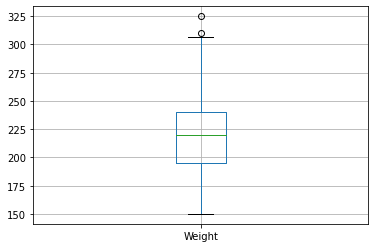

In [45]:
# Visualizamos el boxplot de los datos originales.
nba_unique.boxplot(column = "Weight")

<AxesSubplot:>

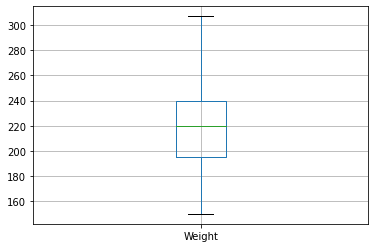

In [46]:
# Visualizamos el boxplot de nba_avg. y observamos que se han eliminado correctamente los outliers.
nba_avg.boxplot(column = "Weight")

## 6.3. Interpretar los resultados.

Si comparamos el resumen estadístico de los datos que nos devuelve la función `describe` antes y después de la eliminación de los outliers en la columna "Weight", podemos comprobar que se han producido cambios en los datos del dataframe. El número de elementos se ha reducido de 274 a 272, ya que existían dos outliers, y esto ha provocado cambios en el resto de estadísticos del atributo como los presentados a continuación:

- La media ha pasado de tener un valor de 219,1 a 218,4.
- Y por su parte el valor máximo ha pasado de ser 325 a 307.

Por otro lado, otros estadísticos se han mantenido igual, como es el caso de la mediana, con un valor de 220, el mínimo (con un valor de 150), y el quartil 1º y 3º, con valores de 195 y 240, respectivamente.

In [47]:
# Resumen estadístico de nba.unique a través de la función `describe`.
nba_unique['Weight'].describe()

count    274.000000
mean     219.077991
std       29.416332
min      150.000000
25%      195.000000
50%      220.000000
75%      240.000000
max      325.000000
Name: Weight, dtype: float64

In [48]:
# Comprobar número de elementos con la función `len`.
len(nba_unique)

274

In [49]:
# Resumen estadístico del nuevo dataframe "nba.avg" con la función `describe`.
nba_avg['Weight'].describe()

count    272.000000
mean     218.354300
std       28.271469
min      150.000000
25%      195.000000
50%      220.000000
75%      240.000000
max      307.000000
Name: Weight, dtype: float64

In [50]:
# Comprobar número de elementos con la función `len`.
len(nba_avg)

272

# 7. Clasificación de jugadores.

## 7.1. Añadir una columna al conjunto de datos denominada “Altura” que contenga los valores: {“bajo”, “normal”, “alto”}. La asignación del valor depende de la altura de cada jugador. Se asigna:

- bajo: los 50 jugadores más bajos.
- alto: los 50 jugadores más altos.
- normal: el resto de jugadores.

In [51]:
# Ordenamos el dataframe por la columna Altura y nos quedamos con el índice. Guardamos el resultado en una variable.
players_sorted_index_height = nba_unique.sort_values(by = "Height").index

# Asignamos los valores "bajo", "normal" y "alto" a las filas que correspondan en el dataframe.
nba_unique.loc[:, "Altura"] = "normal"
nba_unique.loc[players_sorted_index_height[0:50], "Altura"] = "bajo"
nba_unique.loc[players_sorted_index_height[-50:], "Altura"] = "alto"

# Mostramos el dataframe para comprobar el resultado.
nba_unique

C:\Users\maril\.conda\envs\Neoland\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\maril\.conda\envs\Neoland\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,Tiempo,Altura
0,29,NaN,"Apr 14, 1985",1978,195.58,Micheal Ray Richardson,Point Guard,1984-1985,1985,6,New Jersey Nets,189.000000,1.0,7,normal
1,23,NaN,"Apr 7, 1985",1982,198.12,Derek Smith,Shooting Guard,1984-1985,1985,2,Los Angeles Clippers,205.000000,1.0,3,normal
2,28,NaN,"Apr 1, 1985",1979,198.12,Calvin Natt,Forward,1984-1985,1985,5,Denver Nuggets,220.000000,1.0,6,normal
3,37,NaN,"Mar 24, 1985",1969,218.44,Kareem Abdul-Jabbar,Center,1984-1985,1985,15,Los Angeles Lakers,225.000000,1.0,16,alto
4,28,NaN,"Mar 17, 1985",1978,205.74,Larry Bird,Small Forward,1984-1985,1985,5,Boston Celtics,220.000000,1.0,7,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,25,East,"Apr 2, 2018",2013,193.00,Victor Oladipo,Guard,2017-2018,2018,4,Indiana Pacers,209.439185,0.5,5,normal
1115,26,East,"Jan 29, 2018",2012,203.00,Khris Middleton,Small Forward,2017-2018,2018,5,Milwaukee Bucks,233.690038,0.5,6,normal
1123,24,East,"Jan 2, 2018",2012,196.00,Bradley Beal,Shooting Guard,2017-2018,2018,5,Washington Wizards,207.234562,0.5,6,normal
1137,25,East,"Nov 13, 2017",2011,206.00,Tobias Harris,Forward,2017-2018,2018,6,Detroit Pistons,235.894661,0.5,7,normal


## 7.2. Añadir una columna al conjunto de datos denominada “Peso” que contenga los valores: {“bajo”, “normal”, “alto”}. La asignación del valor depende del peso de cada jugador. Se asigna:

- bajo: los 50 jugadores con menor peso.
- alto: los 50 jugadores con mayor peso.
- normal: el resto de jugadores.

In [52]:
# Ordenamos el dataframe por la columna Altura y nos quedamos con el índice. Guardamos el resultado en una variable.
players_sorted_index_weight = nba_unique.sort_values(by = "Weight").index

# Asignamos los valores "bajo", "normal" y "alto" a las filas que correspondan en el dataframe.
nba_unique.loc[:, ['Peso']] = "normal"
nba_unique.loc[players_sorted_index_weight[0:50], ['Peso']] = "bajo"
nba_unique.loc[players_sorted_index_weight[-50:], ['Peso']] = "alto"

# Mostramos el dataframe para comprobar el resultado.
nba_unique

C:\Users\maril\.conda\envs\Neoland\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
C:\Users\maril\.conda\envs\Neoland\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,Tiempo,Altura,Peso
0,29,NaN,"Apr 14, 1985",1978,195.58,Micheal Ray Richardson,Point Guard,1984-1985,1985,6,New Jersey Nets,189.000000,1.0,7,normal,bajo
1,23,NaN,"Apr 7, 1985",1982,198.12,Derek Smith,Shooting Guard,1984-1985,1985,2,Los Angeles Clippers,205.000000,1.0,3,normal,normal
2,28,NaN,"Apr 1, 1985",1979,198.12,Calvin Natt,Forward,1984-1985,1985,5,Denver Nuggets,220.000000,1.0,6,normal,normal
3,37,NaN,"Mar 24, 1985",1969,218.44,Kareem Abdul-Jabbar,Center,1984-1985,1985,15,Los Angeles Lakers,225.000000,1.0,16,alto,normal
4,28,NaN,"Mar 17, 1985",1978,205.74,Larry Bird,Small Forward,1984-1985,1985,5,Boston Celtics,220.000000,1.0,7,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,25,East,"Apr 2, 2018",2013,193.00,Victor Oladipo,Guard,2017-2018,2018,4,Indiana Pacers,209.439185,0.5,5,normal,normal
1115,26,East,"Jan 29, 2018",2012,203.00,Khris Middleton,Small Forward,2017-2018,2018,5,Milwaukee Bucks,233.690038,0.5,6,normal,normal
1123,24,East,"Jan 2, 2018",2012,196.00,Bradley Beal,Shooting Guard,2017-2018,2018,5,Washington Wizards,207.234562,0.5,6,normal,normal
1137,25,East,"Nov 13, 2017",2011,206.00,Tobias Harris,Forward,2017-2018,2018,6,Detroit Pistons,235.894661,0.5,7,normal,normal


## 7.3. Calcular la media y desviación típica del peso (Weight) según la clasificación de altura de los jugadores.

In [53]:
# Agrupamos por Altura y calculamos la media del peso.
nba_unique.groupby(['Altura'])['Weight'].mean()

Altura
alto      252.419621
bajo      184.200000
normal    219.519474
Name: Weight, dtype: float64

In [54]:
# Agrupamos por Altura y calculamos la desviación típica el peso.
nba_unique.groupby(['Altura'])['Weight'].std()

Altura
alto      23.501149
bajo      12.774337
normal    22.131083
Name: Weight, dtype: float64

## 7.4. Realizar un boxplot del peso (Weight) según la clasificación de altura del jugador. Los boxplots deben estar ordenados de menos a mayor altura.

<ipython-input-55-ec748d17837d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_unique['Altura'] = pd.Categorical(nba_unique['Altura'], categories=["bajo", "normal", "alto"], ordered = True)


<AxesSubplot:title={'center':'Weight'}, xlabel='Altura'>

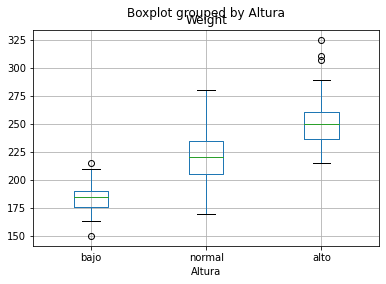

In [55]:
# Convertimos en factor la columna Altura con el orden de levels deseado.
nba_unique['Altura'] = pd.Categorical(nba_unique['Altura'], categories=["bajo", "normal", "alto"], ordered = True)

# Hacemos un boxplot del Peso agrupando por Altura.
nba_unique.boxplot(column = "Weight", by = "Altura")

## 7.5. Hacer un listado con el nombre de jugadores que tienen una altura ‘normal’ y un peso ‘alto’. Ordenar alfabéticamente por nombre.

In [56]:
nba_unique.loc[(nba_unique.Altura == "normal") & (nba_unique.Peso == "alto"), ['Player']].sort_values(by = "Player")

,Player
976,Anthony Davis
450,Antoine Walker
910,Blake Griffin
495,Carlos Boozer
25,Charles Barkley
723,David Lee
718,David West
853,Drew Gooden
417,Elton Brand
248,Jamal Mashburn
